In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [62]:
data = pd.read_csv('2021_Building_Energy_Benchmarking.csv')

In [63]:
data.describe()

,DataYear,TaxParcelIdentificationNumber,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3601.0,3.601000e+03,3546.000000,3599.000000,3599.000000,3588.000000,3601.000000,3601.000000,3601.000000,3.601000e+03,...,3.503000e+03,1913.000000,674.000000,3.503000e+03,3.503000e+03,3.503000e+03,3.601000e+03,3.601000e+03,3601.000000,3601.000000
mean,2021.0,4.301624e+09,98116.629724,47.624973,-122.334797,2.734950,1973.157456,5.073868,1.166343,1.070763e+05,...,8.831043e+04,33468.793518,14069.373887,9.468902e+05,3.044254e+05,1.552859e+04,3.505269e+06,1.544495e+06,117.812552,1.203332
std,0.0,2.965755e+09,17.039279,0.046517,0.027064,2.238307,34.789269,5.706876,2.197812,2.346923e+05,...,2.887680e+05,60996.425173,31333.794090,2.639922e+06,4.554327e+06,7.689428e+04,1.769375e+07,7.646456e+06,574.615639,2.150329
min,2021.0,0.000000e+00,98101.000000,47.499170,-122.414250,1.000000,1896.000000,0.000000,0.000000,2.000000e+04,...,5.656000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2021.0,1.976200e+09,98105.000000,47.601540,-122.350555,1.000000,1953.000000,3.000000,1.000000,2.961900e+04,...,2.620400e+04,5600.000000,2693.500000,1.787300e+05,0.000000e+00,0.000000e+00,6.004510e+05,0.000000e+00,4.800000,0.100000
50%,2021.0,3.426049e+09,98112.000000,47.619410,-122.332290,1.000000,1980.000000,4.000000,1.000000,4.725800e+04,...,4.225100e+04,12762.000000,5895.500000,3.327620e+05,0.000000e+00,3.609000e+03,1.121646e+06,3.449260e+05,27.900000,0.600000
75%,2021.0,7.129305e+09,98122.000000,47.657120,-122.318580,4.000000,2002.000000,6.000000,1.000000,1.010460e+05,...,8.346650e+04,33673.000000,12847.000000,7.793565e+05,0.000000e+00,1.403050e+04,2.662503e+06,1.363852e+06,91.500000,1.400000
max,2021.0,5.569640e+10,98199.000000,47.733870,-122.258640,7.000000,2021.000000,76.000000,111.000000,9.320156e+06,...,1.521647e+07,750000.000000,480625.000000,7.925876e+07,1.680307e+08,3.737314e+06,9.149541e+08,3.737314e+08,20445.700000,47.400000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3663 non-null   object 
 1   DataYear                         3601 non-null   float64
 2   BuildingName                     3601 non-null   object 
 3   BuildingType                     3601 non-null   object 
 4   TaxParcelIdentificationNumber    3601 non-null   float64
 5   Address                          3601 non-null   object 
 6   City                             3600 non-null   object 
 7   State                            3600 non-null   object 
 8   ZipCode                          3546 non-null   float64
 9   Latitude                         3599 non-null   float64
 10  Longitude                        3599 non-null   float64
 11  Neighborhood                     3599 non-null   object 
 12  CouncilDistrictCode 

In [65]:
data.drop(['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','DataYear',
                       'TaxParcelIdentificationNumber', 'City','Address', 'State',
                       'Latitude','Longitude','CouncilDistrictCode',
                       'PropertyGFABuilding(s)','PropertyGFAParking','SiteEUIWN(kBtu/sf)',
                       'SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)'
                       ],axis=1, inplace=True)

In [66]:
data.dropna(inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 3661
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              2467 non-null   object 
 1   BuildingName               2467 non-null   object 
 2   BuildingType               2467 non-null   object 
 3   ZipCode                    2467 non-null   float64
 4   Neighborhood               2467 non-null   object 
 5   YearBuilt                  2467 non-null   float64
 6   NumberofFloors             2467 non-null   float64
 7   NumberofBuildings          2467 non-null   float64
 8   PropertyGFATotal           2467 non-null   float64
 9   ENERGYSTARScore            2467 non-null   float64
 10  SiteEUI(kBtu/sf)           2467 non-null   float64
 11  SiteEnergyUse(kBtu)        2467 non-null   float64
 12  SourceEUI(kBtu/sf)         2467 non-null   float64
 13  EPAPropertyType            2467 non-null   objec

In [68]:
data.columns

Index(['OSEBuildingID', 'BuildingName', 'BuildingType', 'ZipCode',
       'Neighborhood', 'YearBuilt', 'NumberofFloors', 'NumberofBuildings',
       'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SourceEUI(kBtu/sf)', 'EPAPropertyType',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'Electricity(kWh)', 'SteamUse(kBtu)', 'NaturalGas(therms)',
       'ComplianceStatus', 'ComplianceIssue', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [69]:
data.head()

,OSEBuildingID,BuildingName,BuildingType,ZipCode,Neighborhood,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,ENERGYSTARScore,...,LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,MAYFLOWER PARK HOTEL,NonResidential,98101.0,DOWNTOWN,1927.0,12.0,1.0,88434.0,78.0,...,88434.0,944955.0,1798672.0,14876.0,Compliant,No Issue,3224187.0,1487618.0,241.6,2.7
1,2,PARAMOUNT HOTEL,NonResidential,98101.0,DOWNTOWN,1996.0,11.0,1.0,103566.0,96.0,...,88502.0,657478.0,0.0,23738.0,Compliant,No Issue,2243315.0,2373789.0,135.4,1.5
2,3,WESTIN HOTEL (Parent Building),NonResidential,98101.0,DOWNTOWN,1969.0,41.0,3.0,956110.0,96.0,...,945349.0,8673722.0,10583473.0,37750.0,Compliant,No Issue,29594739.0,3775000.0,1201.4,1.6
3,5,HOTEL MAX,NonResidential,98101.0,DOWNTOWN,1926.0,10.0,1.0,61320.0,76.0,...,61320.0,509497.0,1167770.0,19676.0,Compliant,No Issue,1738403.0,1967580.0,208.6,3.4
4,8,WARWICK SEATTLE HOTEL,NonResidential,98121.0,DOWNTOWN,1980.0,18.0,1.0,175580.0,90.0,...,123445.0,1333597.0,0.0,68087.0,Compliant,No Issue,4550233.0,6808702.0,380.4,3.3


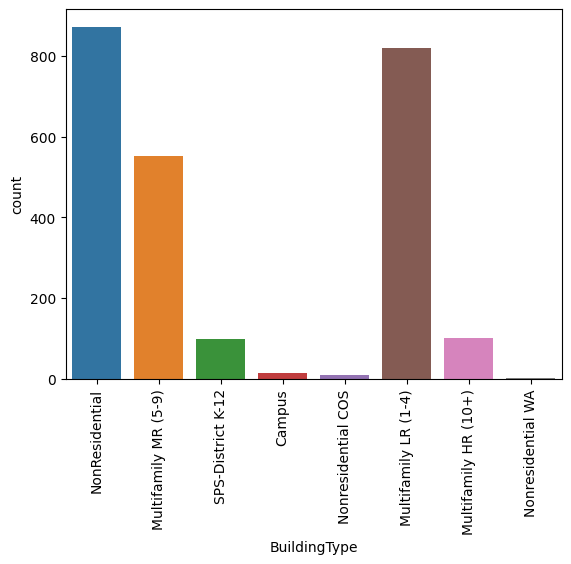

In [75]:
sns.countplot(data = data, x = 'BuildingType')
plt.xticks(rotation=90)
plt.show()

# Retirer data Campus ect car pas assez de données ou améliorer le cleaning

<AxesSubplot: xlabel='YearBuilt', ylabel='OSEBuildingID'>

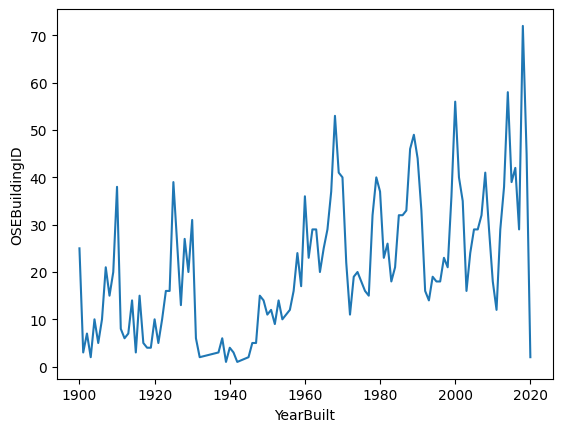

In [71]:
sns.lineplot(x="YearBuilt", y="OSEBuildingID", data=data.groupby('YearBuilt').count().reset_index())

C:\Users\maxpl\AppData\Local\Temp\ipykernel_21260\2757064541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())


<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

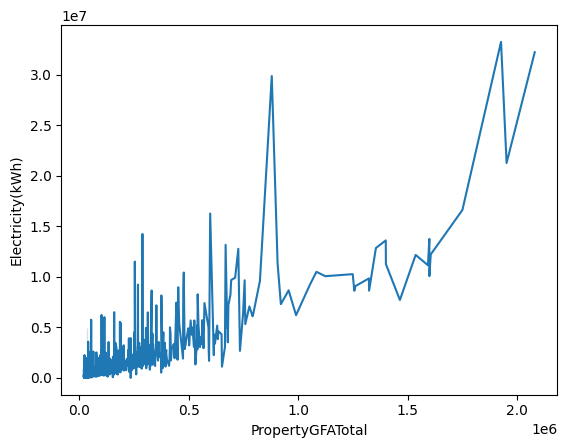

In [72]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())

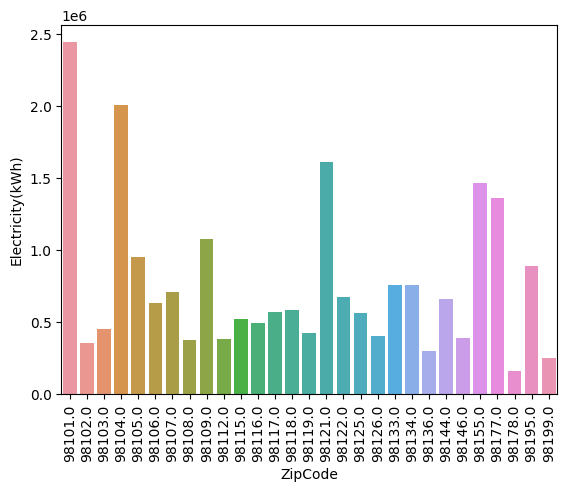

In [74]:
sns.barplot(data=data, x = 'ZipCode', y = 'Electricity(kWh)',errorbar=None)
plt.xticks(rotation=90)
plt.show()  